In [1]:
import numpy as np
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import collections

In [4]:
df = pd.read_csv('../results/max_info_gain_rollout_results.csv')

In [3]:
df.head()

,score_distribution,total_guesses,average_score,mystery_list_lengths
0,"[0, 25, 887, 1303, 97, 3]",8426,3.639741,"[[2315, 61, 7, 1], [2315, 39, 1], [2315, 11, 1..."
1,"[0, 33, 873, 1316, 93]",8414,3.634557,"[[2315, 3, 1], [2315, 42, 1], [2315, 71, 12, 1..."
2,"[1, 34, 867, 1298, 113, 2]",8439,3.645356,"[[2315, 15, 3, 1], [2315, 3, 1], [2315, 29, 3,..."


In [4]:
temp = df.mystery_list_lengths.apply(literal_eval)

In [5]:
temp

0    [[2315, 61, 7, 1], [2315, 39, 1], [2315, 11, 1...
1    [[2315, 3, 1], [2315, 42, 1], [2315, 71, 12, 1...
2    [[2315, 15, 3, 1], [2315, 3, 1], [2315, 29, 3,...
Name: mystery_list_lengths, dtype: object

In [6]:
temp[0][0]

[2315, 61, 7, 1]

In [7]:
lengths = []
scores = []

for word_data in temp:
    for game in word_data:
        for i in range(len(game)):
            lengths.append(game[i])
            scores.append(len(game)-i)

In [8]:
len(lengths)

25279

In [9]:
len(scores)

25279

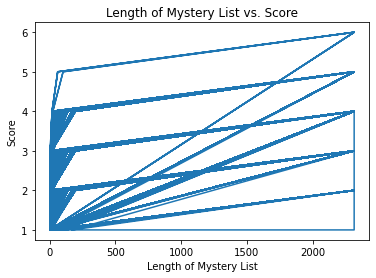

In [10]:
curve = plt.plot(np.array(lengths), np.array(scores))
plt.title('Length of Mystery List vs. Score')
plt.xlabel('Length of Mystery List')
plt.ylabel('Score')
plt.show()

In [11]:
data = curve[0].get_xydata()

In [14]:
len(data)

25279

In [32]:
data_dict = {}
for i in range(len(data)):
    if data[i][0] not in data_dict:
        data_dict[data[i][0]] = []
        data_dict[data[i][0]].append(data[i][1])
    else:
        data_dict[data[i][0]].append(data[i][1])

In [34]:
for key in data_dict:
    data_dict[key] = np.mean(data_dict[key])

In [36]:
data_dict = collections.OrderedDict(sorted(data_dict.items()))

In [38]:
lengths = list(data_dict.keys())
scores = list(data_dict.values())

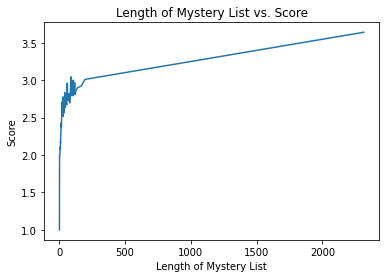

In [39]:
approximation_curve = plt.plot(np.array(lengths), np.array(scores))
plt.title('Length of Mystery List vs. Score')
plt.xlabel('Length of Mystery List')
plt.ylabel('Score')
plt.show()

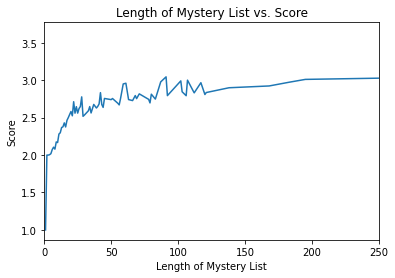

In [40]:
approximation_curve_limited = plt.plot(np.array(lengths), np.array(scores))
plt.title('Length of Mystery List vs. Score')
plt.xlabel('Length of Mystery List')
plt.ylabel('Score')
plt.xlim(0, 250)
plt.show()

In [42]:
final_data = approximation_curve[0].get_xydata()
np.save('approximation_curve_data.npy', final_data)